In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import hamming_loss, confusion_matrix, jaccard_similarity_score, accuracy_score

In [2]:
df = pd.read_csv('data_3k.csv')
print(df.shape)
df.head(2)

(3822, 21)


,name,tempo,beats,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,mfcc_1,...,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,label
0,Aaron Lewis - 'Country Boy' (Official Video).m...,125.000000,59,0.409949,0.044608,2684.678379,3327.070199,5616.759798,0.054827,150.374682,...,41.741827,-12.544442,28.144194,-13.241323,17.689333,-4.589490,3.226390,-4.043833,4.592962,Country
1,Aaron Lewis - 'Country Boy' (Official Video).m...,119.680851,58,0.431026,0.053247,2512.620073,3235.770491,4958.476826,0.053470,162.977125,...,29.105995,-7.695438,26.248572,-13.276758,15.348517,1.977714,0.815487,-3.722481,5.629056,Country


In [3]:
X = df.drop(['name', 'label'],  axis=1).astype(float)
genre_map = {g:i for i, g in enumerate(df.label.unique())}
y = df.label#.map(genre_map)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train);

In [6]:
pred_probas = svc.predict_proba(X_test_scaled)
preds = svc.predict(X_test_scaled)

In [7]:
hamming_loss(y_test, preds)

0.24705882352941178

In [8]:
jaccard_similarity_score(y_test, preds)

0.7529411764705882

In [14]:
accuracy_score(y_test, preds)

0.7529411764705882

{'Country': 0, 'Jazz': 1, 'Metal': 2, 'Hip_Hop': 3, 'Electronic': 4, 'Classical': 5}
[[ 98   4   1  14   6  13]
 [  1 116   2   0   2   1]
 [  9  17 106   0   2   2]
 [  4   2   3  86  12  11]
 [ 10   2   2  29  69   8]
 [ 14   5   3   3   7 101]]


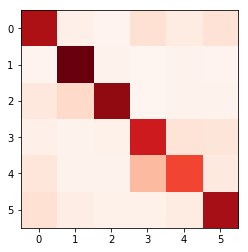

In [15]:
cm = confusion_matrix(y_test, preds,labels=['Country', 'Classical', 'Jazz', 'Electronic', 'Hip_Hop', 'Metal'])
plt.imshow(cm,cmap='Reds')
print(genre_map)
print(cm)

In [16]:
svc = SVC()
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 0.5, 1, 5, 10],
    'gamma': ['scale', 'auto']
}

In [24]:
grid = GridSearchCV(estimator=svc, param_grid=param_grid, iid=False, cv=5,
                    return_train_score=True)

In [25]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 0.5, 1, 5, 10], 'gamma': ['scale', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [27]:
svc = SVC(gamma='auto')
param_grid = {
    'C': [10, 20, 50, 100, 1000],
    'decision_function_shape': ['ovo', 'ovr']
}
grid = GridSearchCV(estimator=svc, param_grid=param_grid, iid=False, cv=5, return_train_score=True)
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'C': [10, 20, 50, 100, 1000], 'decision_function_shape': ['ovo', 'ovr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [28]:
grid.best_params_

{'C': 20, 'decision_function_shape': 'ovo'}

In [29]:
preds = grid.predict(X_test_scaled)
hamming_loss(y_test, preds)

0.18823529411764706

In [30]:
svc = SVC(gamma='auto')
param_grid = {
    'C': [15, 20, 25, 30],
    'decision_function_shape': ['ovo', 'ovr']
}
grid = GridSearchCV(estimator=svc, param_grid=param_grid, iid=False, cv=5, return_train_score=True, )
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'C': [15, 20, 25, 30], 'decision_function_shape': ['ovo', 'ovr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
print(grid.best_params_)
preds = grid.predict(X_test_scaled)
hamming_loss(y_test, preds)

{'C': 25, 'decision_function_shape': 'ovo'}


0.1830065359477124

In [154]:
genre_map.keys()

dict_keys(['Country', 'Jazz', 'Metal', 'Hip_Hop', 'Electronic', 'Classical'])

[[117   1   0   2   1   1]
 [  1 109   9   2   4  11]
 [  2   6  92  11   3   4]
 [  2  10  19  84   0   5]
 [ 11   6   3   2 112   2]
 [  4   9   2   9   2 107]]


array(['Country', 'Jazz', 'Metal', 'Hip_Hop', 'Electronic', 'Classical'],
      dtype=object)

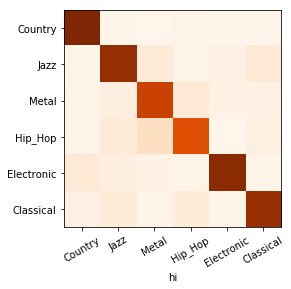

In [138]:
cm = confusion_matrix(y_test, preds)
plt.imshow(cm,cmap='Oranges')
plt.xticks(np.arange(6),labels=['Country', 'Jazz', 'Metal', 'Hip_Hop', 'Electronic', 'Classical'], rotation=30)
plt.yticks(np.arange(6),labels=['Country', 'Jazz', 'Metal', 'Hip_Hop', 'Electronic', 'Classical'])
print(cm)
df.label.unique()

In [157]:
"""
Present to bookers, and/promoters
They can receive mp3 input from artists and 
    auto email out feelers to genre appropriate targets:
    media, venues, networking, bookers/promoters
"""

'\nPresent to bookers, and/promoters\nThey can receive mp3 input from artists and \n    auto email out feelers to genre appropriate targets:\n    media, venues, networking, bookers/promoters\n'